# Случайный лес. Практика.

## Подготовка данных

Данные, с которыми мы сегодня работаем взяты с платформы Kaggle: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

**Задача**: по метеорологическим данным на сегодняшний день предсказывать наличие дождя завтра

**Тип**: бинарная классификация

Загрузим и посмотрим данные

In [1]:
import pandas as pd


data = pd.read_csv('./data/weatherAUS.csv')
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Посмотрим какие типы данных есть в нашем датасете:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Посмотрим долю пропусков:

In [3]:
data.isna().mean(axis=0)

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

Для простоты, избавимся от объектов, целевой признак в которых пропущен

In [4]:
data.dropna(subset=['RainTomorrow'], inplace=True)

Удалим поле с датой, так как не планируем им пользоваться

In [5]:
data.drop(columns=['Date'], inplace=True)

Выделим отдельно категориальные и числовые признаки

In [6]:
numerical_features = list(data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64')])
categorical_features = list(data.columns[data.dtypes == object])

Сначала посмотрим на те признаки, которые были отнесены к категориальным

In [7]:
data[categorical_features].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


Заменим значения категориальных признаков с No/Yes на 0/1

In [8]:
data = data.replace(['No', 'Yes'], [0, 1])

Перенесем измененные на предыдущем шаге признаки из категориальных в числовые

In [9]:
for feature in ['RainToday', 'RainTomorrow']:
    categorical_features.remove(feature)
    numerical_features.append(feature)

Поскольку в поле RainToday были пропуски, заполним их модальным значением

In [10]:
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])

Посмотрим какие категоириальные признаки остались

In [11]:
data[categorical_features].head()

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW


Посмотрим количество и распределение уникальных значений оставшихся признаков:

In [12]:
data['Location'].value_counts(dropna=False)

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [66]:
data['WindGustDir'].value_counts(dropna=False)

W      9780
NaN    9330
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [13]:
data['WindDir9am'].value_counts(dropna=False)

N      11393
NaN    10013
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [67]:
data['WindDir3pm'].value_counts(dropna=False)

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
NaN     3778
Name: WindDir3pm, dtype: int64

Завершая предобработку категориальных признаков, закодируем их с помощью one-hot-encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()
encoder.fit(data[categorical_features])
categories = []
for i, feature in enumerate(categorical_features):
    categories.extend([f'{feature}: {value}' for value in encoder.categories_[i]])
data.loc[:, categories] = encoder.transform(data[categorical_features]).toarray().astype(int)

/var/folders/wb/r313lqxj0blcb_3d4p6nv5zw0000gn/T/ipykernel_1123/3654389271.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, categories] = encoder.transform(data[categorical_features]).toarray().astype(int)


Посчитаем итоговое суммарное количество уникальных значение закодированных категориальных признаков

In [17]:
number_of_categorical = sum([data[field].nunique(dropna=False) for field in categorical_features])
number_of_categorical

100

Посмотрим на пропуски в числовых признаках и обработаем их

In [18]:
data[numerical_features].isna().mean(axis=0)

MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustSpeed    0.065193
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64

In [19]:
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].mean(axis=0))

## Обучение модели

Разделим данные на обучающие и тестовые

In [20]:
from sklearn.model_selection import train_test_split


features = numerical_features + categories
features.remove('RainTomorrow')
X = data[features]
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

Инициализируем и обучим нашу модель

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=500, n_jobs=4, verbose=1, oob_score=True)
model.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   32.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   36.1s finished


CPU times: user 2min 33s, sys: 2.81 s, total: 2min 35s
Wall time: 49.8 s


RandomForestClassifier(n_estimators=500, n_jobs=4, oob_score=True, verbose=1)

Для удобства создаем функцию, которая будет возвращать метрики сразу на обучающих и тестовых данных:

In [22]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


def get_metrics(model):
    results = []
    y_pred = model.predict_proba(X_train)
    roc_auc = roc_auc_score(y_train, y_pred[:, 1])
    acc = accuracy_score(y_train, y_pred.argmax(axis=1))
    f1 = f1_score(y_train, y_pred.argmax(axis=1))
    results.append(['Train', roc_auc, acc, f1])
    y_pred = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_pred[:, 1])
    acc = accuracy_score(y_test, y_pred.argmax(axis=1))
    f1 = f1_score(y_test, y_pred.argmax(axis=1))
    results.append(['Test', roc_auc, acc, f1])
    return pd.DataFrame(columns=['Group', 'ROC-AUC', 'Accuracy', 'F1'], data=results)

In [23]:
get_metrics(model)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.7s finished


,Group,ROC-AUC,Accuracy,F1
0,Train,0.999978,0.99996,0.99991
1,Test,0.886775,0.85658,0.61195


Посмотрим на OOB метрики

In [25]:
print(f'OOB ROC-AUC: {roc_auc_score(y_train, model.oob_decision_function_[:, 1])}')

OOB ROC-AUC: 0.8886258294637328


Посмотрим как меняется метрика ROC-AUC в зависимости от количества деревьев:

In [27]:
%%time
pred_train = np.hstack((estimator.predict_proba(X_train.values)[:, 1].reshape((-1 , 1)) for estimator in model.estimators_))
pred_test = np.hstack((estimator.predict_proba(X_test.values)[:, 1].reshape((-1 , 1)) for estimator in model.estimators_))

<timed exec>:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
<timed exec>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


CPU times: user 48.2 s, sys: 6.66 s, total: 54.9 s
Wall time: 55.3 s


In [29]:
%%time
roc_auc = {'Train': [], 'Test': []}
for i in range(1, pred_train.shape[1]):
    roc_auc['Train'].append(roc_auc_score(y_train, pred_train[:, :i].mean(axis=1)))
for i in range(1, pred_train.shape[1]):
    roc_auc['Test'].append(roc_auc_score(y_test, pred_test[:, :i].mean(axis=1)))

CPU times: user 34.2 s, sys: 269 ms, total: 34.5 s
Wall time: 34.7 s


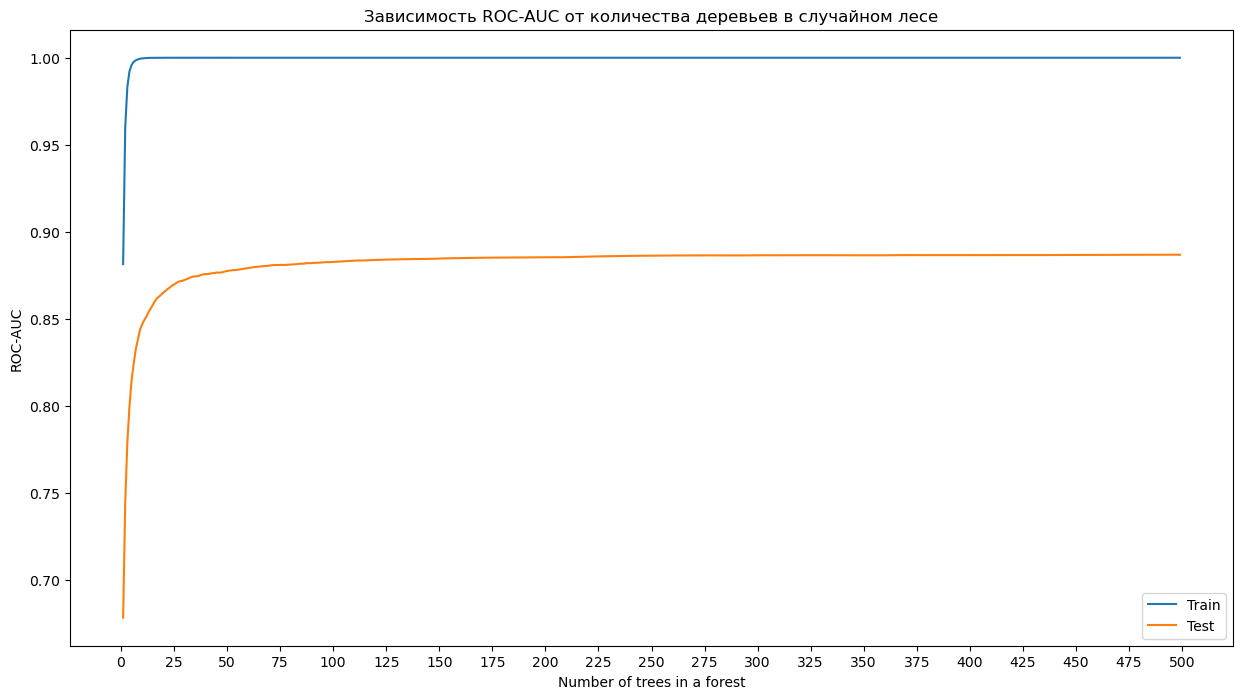

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
plt.plot(range(1, pred_train.shape[1]), roc_auc['Train'], label='Train')
plt.plot(range(1, pred_test.shape[1]), roc_auc['Test'], label='Test')
plt.xticks(ticks=np.arange(0, pred_train.shape[1] + 1, 25))
plt.title('Зависимость ROC-AUC от количества деревьев в случайном лесе')
plt.xlabel('Number of trees in a forest')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

Убедимся в том, что достаточно меньшее количество деревьев

In [32]:
model = RandomForestClassifier(n_estimators=125, n_jobs=4, verbose=1, oob_score=True)
model.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    9.2s finished


RandomForestClassifier(n_estimators=125, n_jobs=4, oob_score=True, verbose=1)

In [33]:
get_metrics(model)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    0.4s finished


,Group,ROC-AUC,Accuracy,F1
0,Train,0.999978,0.999960,0.999910
1,Test,0.883194,0.855572,0.611318


## Бонусы случайного леса

Выведем признаки с наибольшей важностью

In [34]:
pd.DataFrame(data={'feature': features, 
                   'importance': model.feature_importances_}).sort_values('importance', ascending=False).iloc[:10]

,feature,importance
9,Humidity3pm,0.136563
2,Rainfall,0.055149
11,Pressure3pm,0.054880
8,Humidity9am,0.051969
5,WindGustSpeed,0.050012
10,Pressure9am,0.049686
4,Sunshine,0.048261
15,Temp3pm,0.046380
1,MaxTemp,0.042709
0,MinTemp,0.042610


Посмотрим как меняютя предсказания нашей модели в зависимости от значений признаков

In [36]:
obj = X_test.iloc[:1].copy()
obj

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm: NW,WindDir3pm: S,WindDir3pm: SE,WindDir3pm: SSE,WindDir3pm: SSW,WindDir3pm: SW,WindDir3pm: W,WindDir3pm: WNW,WindDir3pm: WSW,WindDir3pm: nan
80851,15.0,29.7,0.0,10.6,0.4,48.0,17.0,13.0,26.0,39.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
model.predict_proba(obj)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    0.0s finished


array([[0.736, 0.264]])

In [38]:
obj.loc[:, ['Humidity3pm']] = 90.
obj

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm: NW,WindDir3pm: S,WindDir3pm: SE,WindDir3pm: SSE,WindDir3pm: SSW,WindDir3pm: SW,WindDir3pm: W,WindDir3pm: WNW,WindDir3pm: WSW,WindDir3pm: nan
80851,15.0,29.7,0.0,10.6,0.4,48.0,17.0,13.0,26.0,90.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
model.predict_proba(obj)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:    0.0s finished


array([[0.328, 0.672]])